In [ ]:
!wget https://www.shutterstock.com/image-photo/man-hands-holding-global-network-260nw-1801568002.jpg

--2022-12-24 06:54:42--  https://www.shutterstock.com/image-photo/man-hands-holding-global-network-260nw-1801568002.jpg
Resolving www.shutterstock.com (www.shutterstock.com)... 13.225.214.6, 13.225.214.36, 13.225.214.24, ...
Connecting to www.shutterstock.com (www.shutterstock.com)|13.225.214.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20648 (20K) [image/jpeg]
Saving to: ‘man-hands-holding-global-network-260nw-1801568002.jpg’

man-hands-holding-g 100%[===================>]  20.16K  --.-KB/s    in 0s      

2022-12-24 06:54:42 (75.7 MB/s) - ‘man-hands-holding-global-network-260nw-1801568002.jpg’ saved [20648/20648]



In [ ]:
from math import sqrt
import random
try:
  import Image
except ImportError:
  from PIL import Image

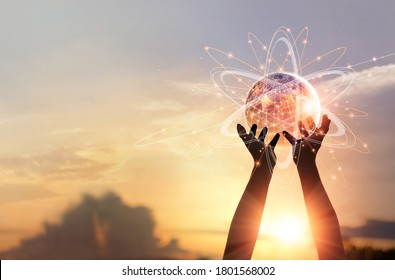

In [ ]:
from IPython.display import Image as CImage
CImage("man-hands-holding-global-network-260nw-1801568002.jpg", width=350, height=700)

In [ ]:
class Point:
  
  def __init__(self, coordinates):
    self.coordinates = coordinates

In [ ]:
class Cluster:
  
  def __init__(self, center, points):
    self.center = center
    self.points = points

In [ ]:
class KMeans:
  
  def __init__(self, n_clusters, min_diff = 1):
    self.n_clusters = n_clusters
    self.min_diff = min_diff
    
  def calculate_center(self, points):    
    n_dim = len(points[0].coordinates)    
    vals = [0.0 for i in range(n_dim)]    
    for p in points:
      for i in range(n_dim):
        vals[i] += p.coordinates[i]
    coords = [(v / len(points)) for v in vals]    
    return Point(coords)
  
  def assign_points(self, clusters, points):
    plists = [[] for i in range(self.n_clusters)]

    for p in points:
      smallest_distance = float('inf')

      for i in range(self.n_clusters):
        distance = euclidean(p, clusters[i].center)
        if distance < smallest_distance:
          smallest_distance = distance
          idx = i

      plists[idx].append(p)
    
    return plists
    
  def fit(self, points):
    clusters = [Cluster(center=p, points=[p]) for p in random.sample(points, self.n_clusters)]
    
    while True:

      plists = self.assign_points(clusters, points)

      diff = 0

      for i in range(self.n_clusters):
        if not plists[i]:
          continue
        old = clusters[i]
        center = self.calculate_center(plists[i])
        new = Cluster(center, plists[i])
        clusters[i] = new
        diff = max(diff, euclidean(old.center, new.center))

      if diff < self.min_diff:
        break

    return clusters

In [ ]:
def euclidean(p, q):
  n_dim = len(p.coordinates)
  return sqrt(sum([
      (p.coordinates[i] - q.coordinates[i]) ** 2 for i in range(n_dim)
  ]))

In [ ]:
def percent(p):
    percent = []
    for i in range(len(p.coordinates)):
        j = labels.count(i)
        j = j/ (len(labels))
        percent.append(j)
    return percent

In [ ]:
def get_points(image_path):  
  img = Image.open(image_path)
  img.thumbnail((200, 400))
  img = img.convert("RGB")
  w, h = img.size
  
  points = []
  for count, color in img.getcolors(w * h):
    for _ in range(count):
      points.append(Point(color))
    
  return points

In [ ]:
def rgb_to_hex(rgb):
  return '#%s' % ''.join(('%02x' % p for p in rgb))

def get_colors(filename, n_colors=3):
  points = get_points(filename)
  clusters = KMeans(n_clusters=n_colors).fit(points)
  clusters.sort(key=lambda c: len(c.points), reverse = True)
  rgbs = [map(int, c.center.coordinates) for c in clusters]
  return list(map(rgb_to_hex, rgbs))

In [ ]:
colors1 = get_colors('man-hands-holding-global-network-260nw-1801568002.jpg', n_colors=5)

In [ ]:
", ".join(colors1)

'#eccfa2, #b5aeb1, #cc936c, #6d4634, #fcfbf5'

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (2304, 3456, 3)


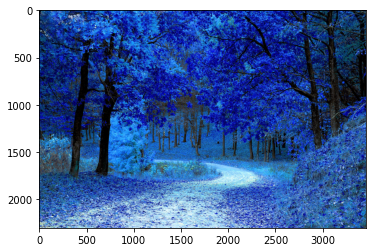

In [ ]:
image = cv2.imread('/content/images/pexels-pixabay-33109.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

## Output
# The type of this input is <class 'numpy.ndarray'>
# Shape: (3456, 4608, 3)

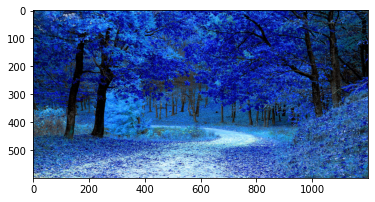

In [ ]:

resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

In [ ]:

def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [ ]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [ ]:

modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

In [ ]:

clf = KMeans(n_clusters = 6)
labels = clf.fit_predict(modified_image)

[array([156.11606373, 201.12469086, 232.69126359]),
 array([ 31.75012346,  82.3796817 , 174.67545523]),
 array([ 10.31372949,  24.27449914, 137.77860121]),
 array([30.04646186, 60.46379013, 99.87094696]),
 array([14.88258493, 17.64495994, 30.15756785]),
 array([ 58.91622775, 129.55338109, 211.46731235])]

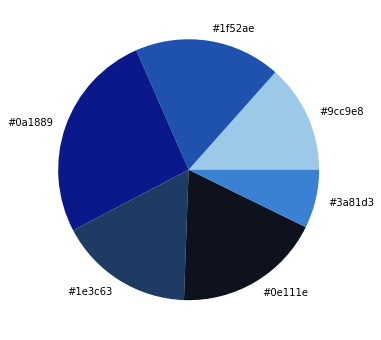

In [ ]:

counts = Counter(labels)

center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

if (True):
    plt.figure(figsize = (8, 6))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

rgb_colors

In [ ]:
images = []
IMAGE_DIRECTORY = 'images'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0]
}


for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

<Figure size 1440x720 with 0 Axes>

In [ ]:

def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [ ]:

def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

In [ ]:
plt.figure(figsize = (20, 10))
show_selected_images(images, "GREEN", 60, 5)

NameError: ignored

<Figure size 1440x720 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
values = percent()
fig1, ax1 = plt.subplots()
ax1.pie(values,autopct = '%1.1f%%', colors = colors)
plt.savefig('Title.pdf')

NameError: ignored

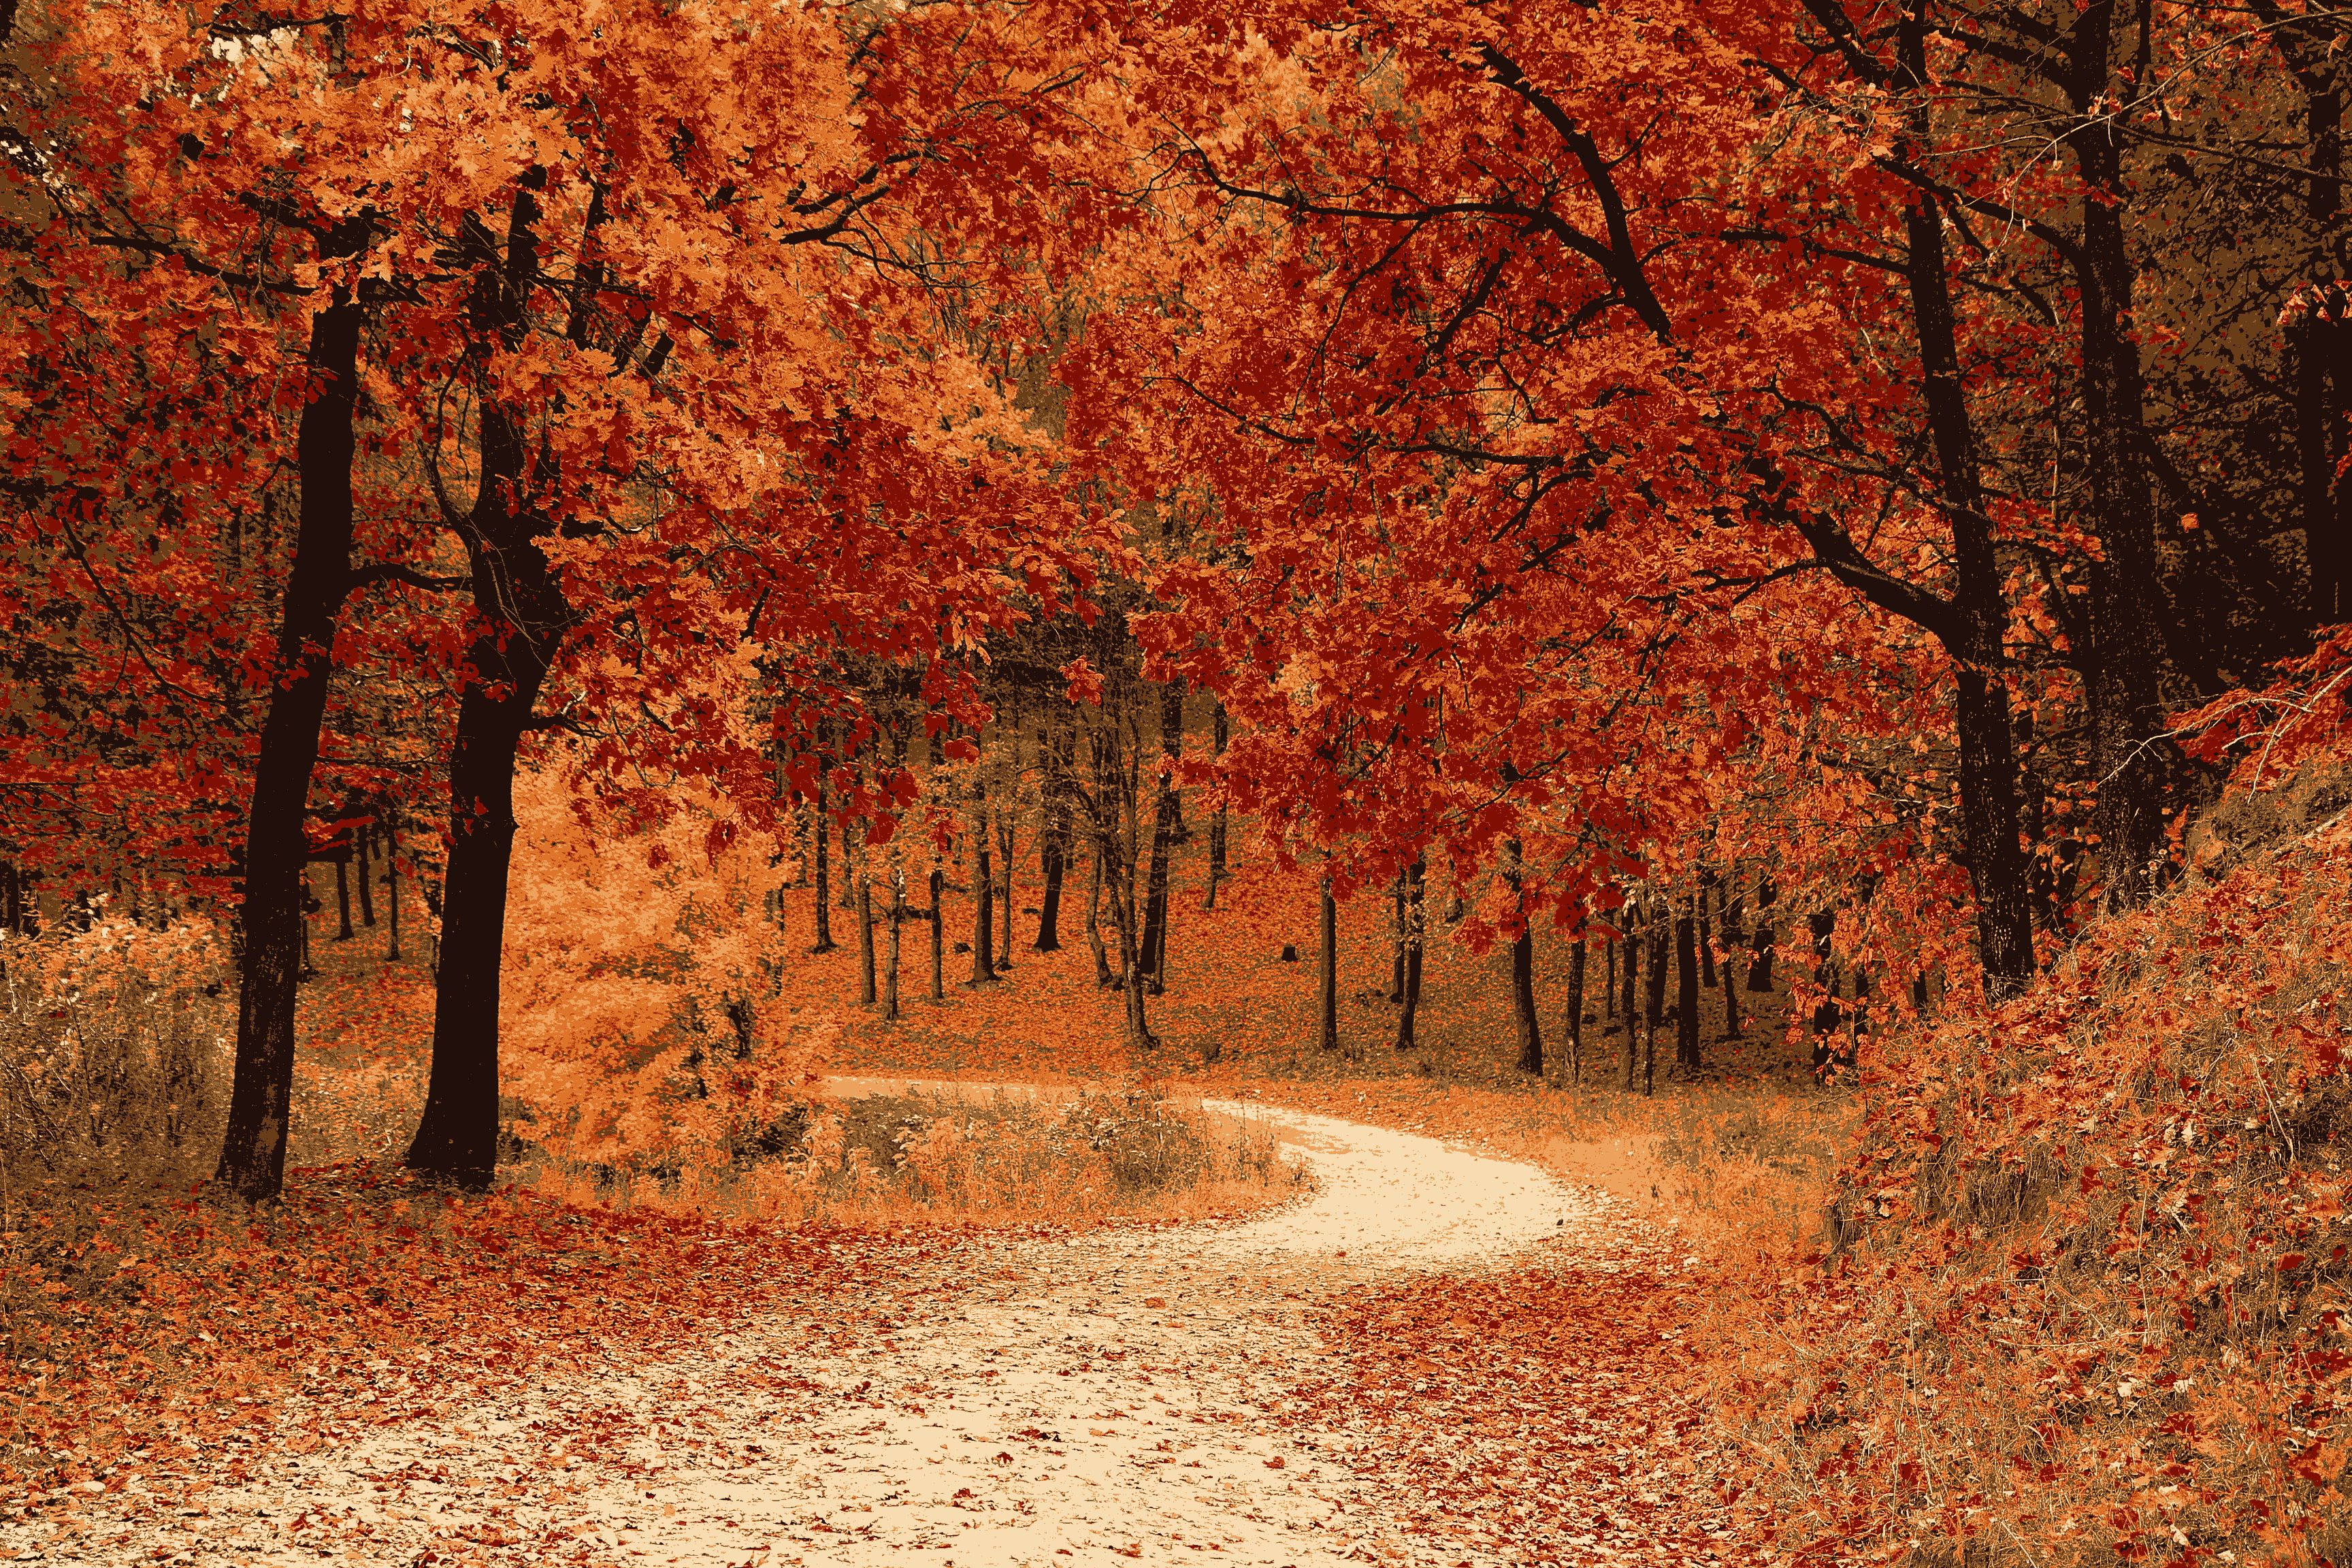

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# read input image
img = cv2.imread('/content/pexels-pixabay-33109.jpg', cv2.IMREAD_UNCHANGED)

z = img.reshape((-1,3))

# convert to np.float32
z = np.float32(z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
ret,label,center=cv2.kmeans(z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

# display the image

cv2_imshow(res2)
cv2.waitKey(0)
cv2.destroyAllWindows()